### [Perceptrons](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
![perceptron](px/perceptron.png)
- Learns a function with $m$-dimensional inputs and $o$-dimensional outputs. Given a set of features $X$ and a target $y$ it can learn __non-linear approximations__ for either classifications or regressions.
- MLPs uses *hidden layers*. Each neuron in a hidden layer transforms the previous layer's values with a *weighted linear summation* $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a *nonlinear activation function* $g(\cdot):R \rightarrow R$ - for example, a hyperbolic tangent function.
- The output layer receives values from the last hidden layer.
- `coefs_` is a list of weight matrices. The $ith$ matrix is the weights between layer $i$ and $i+1$.
- `intercepts_` is a list of bias vectors. The $ith$ vector is the biases added to layer $i+1$.


- Advantages:
    - Can learn non-linear models.
    - Can learn models in real time (aka "online") using `partial_fit`.
- Disadvantages:
    - MLPs with hidden layers can have non-convex loss functions - multiple local minima can occur. Use multiple, random weight initializations to aid validation accuracy.
    - Lots of hyperparameter tuning.
    - Sensitive to feature scaling.

### [Classification](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
- MLP trains on two arrays: training samples $X$ (#samples, #features), floating-point vectors; and $Y$ (class labels).

In [8]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

- MLP can fit non-linear models. `clf_coefs_` contains the weight matrix.

In [9]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

- MLP supports the `cross-entropy` loss function which returns a vector of probability estimates $P(y|x)$ (via `predict_proba`).
- Currently, MLPClassifier supports only the `cross-entropy` loss function, which allows probability estimates by running the `predict_proba` method.
- MLP trains using __Backpropagation__, ie a form of __gradient descent__ and the gradients are calculated using Backpropagation. For classification, it minimizes the __Cross-Entropy__ loss function, giving a vector of probability estimates per sample.

In [10]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

### Multiclass & Multilabel Classification
- Multiclass classification is supported by using [Softmax](https://en.wikipedia.org/wiki/Softmax_activation_function) as the output function.
- Multilabel classification is supported. Each class passes through a logistic function, so values=>0.5 are rounded to 1 - otherwise to 0.

In [11]:
X,y = [[0., 0.], [1., 1.]], [[0, 1], [1, 1]]

clf = MLPC(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X, y)

print(clf.predict([[1., 2.]]))
print(clf.predict([[0., 0.]]))


[[1 1]]
[[0 1]]


### [Example: MLP Classifier learning strategies, compared](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)
- Plot training loss curves for various stochastic learning/loss functions incl __SGD__ and __Adam__.
- Using smaller dataset for runtime purposes. L-BFGS may be more suitable.
- Results can heavily depend on `learning_rate_init`.

In [12]:
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant',   'momentum': 0, 
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant',   'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant',   'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant", 
          "constant/momentum",
          "constant/momentum/nesterov",
          "inv-scaling", 
          "inv-scaling/momentum",
          "inv-scaling/momentum/nesterov", 
          "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

Training score: 0.980000
Training loss: 0.080111
Training score: 0.980000
Training loss: 0.049530
Training score: 0.980000
Training loss: 0.049540
Training score: 0.360000
Training loss: 0.978444
Training score: 0.913333
Training loss: 0.413729
Training score: 0.913333
Training loss: 0.413771
Training score: 0.980000
Training loss: 0.045311


/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Training score: 0.996105
Training loss: 0.039449
Training score: 1.000000
Training loss: 0.002917
Training score: 1.000000
Training loss: 0.003211


/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Training score: 0.742348
Training loss: 1.694566


/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Training score: 0.939900
Training loss: 0.222345


/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Training score: 0.938787
Training loss: 0.236703
Training score: 1.000000
Training loss: 0.001729
Training score: 0.920000
Training loss: 0.210100
Training score: 0.940000
Training loss: 0.154997
Training score: 0.940000
Training loss: 0.150630
Training score: 0.500000
Training loss: 0.692470
Training score: 0.500000
Training loss: 0.689143
Training score: 0.500000
Training loss: 0.689751
Training score: 0.940000
Training loss: 0.150527
Training score: 0.850000
Training loss: 0.341523
Training score: 0.850000
Training loss: 0.336188
Training score: 0.850000
Training loss: 0.335919
Training score: 0.500000
Training loss: 0.689015
Training score: 0.830000
Training loss: 0.462310
Training score: 0.830000
Training loss: 0.462435
Training score: 0.950000
Training loss: 0.107057


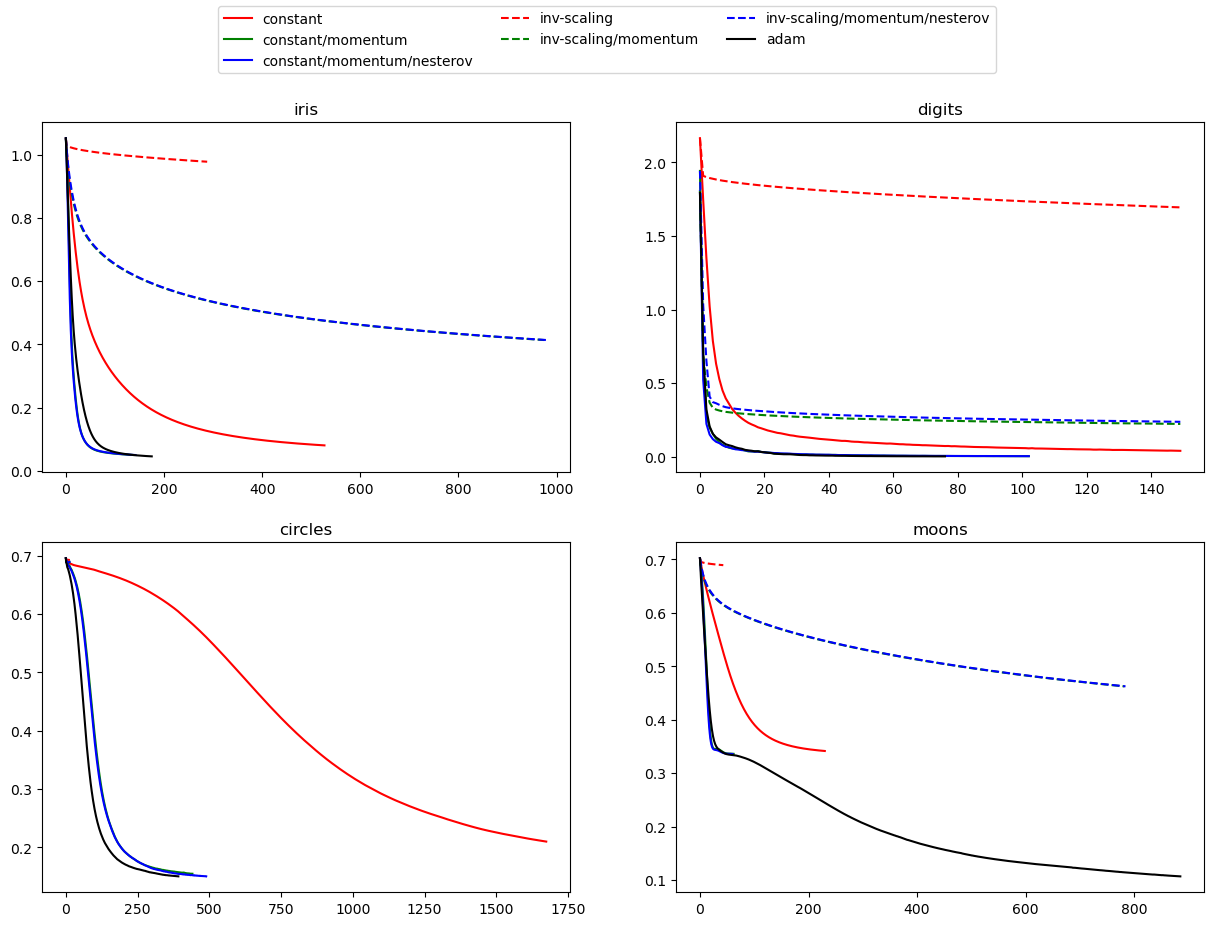

In [17]:
def plot_on_dataset(X, y, ax, name):
    ax.set_title(name)

    X = MMS().fit_transform(X)
    mlps = []
    if name == "digits": # digits is larger but converges fairly quickly
        max_iter = 150 # was 15
    else:
        max_iter = 4000 # was 400

    for label, param in zip(labels, params):
        mlp = MLPC(random_state=0, max_iter=max_iter, **param)

        # some combinations will not converge as can be seen on the
        # plots so they are ignored here
        '''
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        '''
        mlp.fit(X, y)

        mlps.append(mlp)
        print("Training score: %f" % mlp.score(X, y))
        print("Training loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)

data_sets = [(iris.data, iris.target),
             (X_digits, y_digits),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

### [example: plot weights, MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py)

- This example shows how to plot the first layer weights in a MLPClassifier trained on the MNIST dataset.
- input data: 28x28 pixel handwritten digits, leading to 784 features in the dataset. Therefore the first layer weight matrix has the shape (784, hidden_layer_sizes). We can therefore visualize a single column of the weight matrix as a 28x28 pixel image.
- To make the example run faster, we __use few hidden units__, and __train for a short time__. Training longer would result in weights with a much smoother spatial appearance. The example will throw a warning because it doesn’t converge.

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Training set score: 0.986429
Test set score: 0.953061


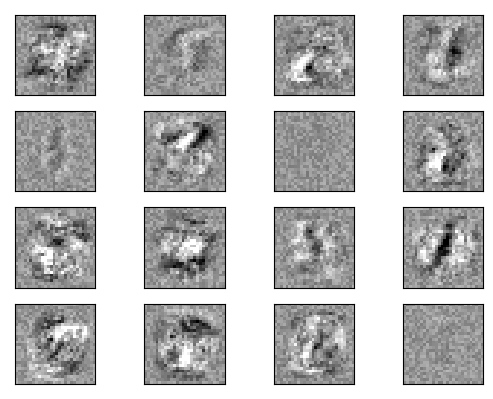

In [26]:
import warnings

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4,4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

### [Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)
- The regressor trains an MLP using backprop with __no activation function__ (aka "the identity function") in the output layer.
- It therefore uses __square error__ as the loss function. Outputs are continuous.
- Multi-output regression is supported.

In [18]:
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split as TTS

X, y                             = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = TTS(X, y, random_state=1)
regr                             = MLPR(random_state=1, max_iter=5000).fit(X_train, y_train)

print(regr.predict(X_test[:2]))
print(regr.score(X_test, y_test))


[8.69448846 6.5006531 ]
0.5209157440819883


### Regularization
- The classifier and regressor both use $\alpha$ for L2 regularization. This helps prevent overfitting by penalizing large-magnitude weights.

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap as LCM
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import StandardScaler as SS
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.pipeline import make_pipeline

In [20]:
h           = .02  # step size in the mesh
alphas      = np.logspace(-1, 1, 5)
classifiers = []
names       = []

for alpha in alphas:
    classifiers.append(make_pipeline(
        SS(),
        MLPC(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X  += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

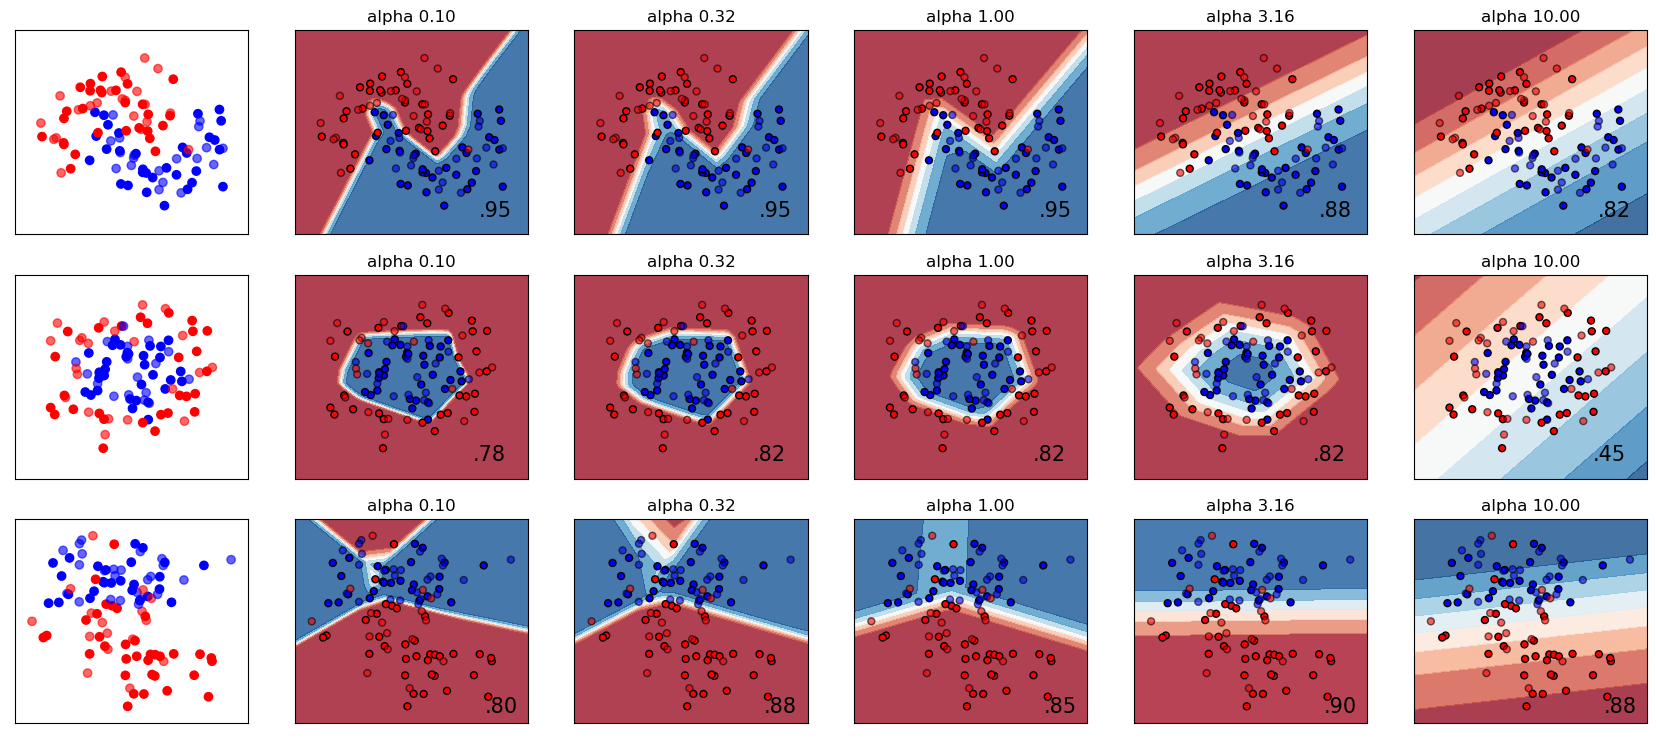

In [21]:
figure = plt.figure(figsize=(17, 9))
i = 1
for X, y in datasets:
    X_train, X_test, y_train, y_test = TTS(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = LCM(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # training & testing points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. 
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # training & testing points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='black', s=25)
        ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

### Training
- MLP training uses [SGD (Wikipedia)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), [Adam (arxiv)](https://arxiv.org/abs/1412.6980) or [L-BFGS (Wikipedia)](https://en.wikipedia.org/wiki/Limited-memory_BFGS).

- SGD updates parameters using the gradient of the loss function w.r.t. a parameter that needs adaptation: $w \leftarrow w - \eta (\alpha \frac{\partial R(w)}{\partial w}
+ \frac{\partial Loss}{\partial w})$, where $\eta$ is the learning rate & $Loss$ is the loss function.

- SGD with Momentum (aka `nesterov`) can perform better than Adam or L-BFGS if the learning rate is correctly tuned.

- Adam is similar to SGD, and can automatically adjust the parameter update amounts. It is very robust on large datasets and usually converges very quickly.

- L-BFGS approximates a Hessian matrix of the 2nd-order partial derivative of a function. It also approximates a Hessian matrix *inverse* to do the parameter updates. The implementation is based on SciPy. It converges quickly on smaller datasets.

- SGD & Adam support both online & minibatch learning; L-BFGS does not.

### Complexity & Tips
- Given $i$ iterations, $n$ training samples, $m$ features, $k$ hidden layers with $h$ neurons each, and $o$ output neurons, backprop complexity is $O(n\cdot m \cdot h^k \cdot o \cdot i)$.
- Consider starting with smaller numbers of hidden neurons & hidden layers for training.
- MLP is sensitive to *feature scaling*. Scale or standardize your data first.
- Use a reasonable regularization value for $\alpha$ - find it using, for example `GridSearchCV`.

### Additional Controls
- Use `warm_start=True` and `max_iter=1` if you need additional control of stopping or the learning rate, and/or you need additional monitoring.

In [22]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)
for i in range(10):
    clf.fit(X, y)
    # additional monitoring / inspection

/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bjpcjp/.local/lib/python3.11/site-packages/sklearn